In [3]:
# load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


%matplotlib inline

In [4]:
# read in clean database
df1 = pd.read_csv("clean_diabetes_df.csv")
df1.head(3)

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6.0,148.0,72.0,35,39.0,33.6,0.627,50,1
1,2,8.0,183.0,64.0,27,39.0,23.3,0.672,32,1
2,4,0.0,137.0,40.0,35,168.0,43.1,2.288,33,1


In [5]:
# split data into dependent and independent variables
X = df1.drop(['Outcome', 'Unnamed: 0'], axis=1)
y = df1['Outcome']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


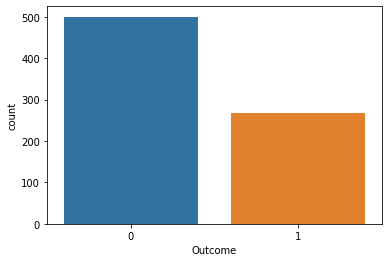

In [6]:
# check class balance in dependent class
sns.countplot('Outcome',data=df1)

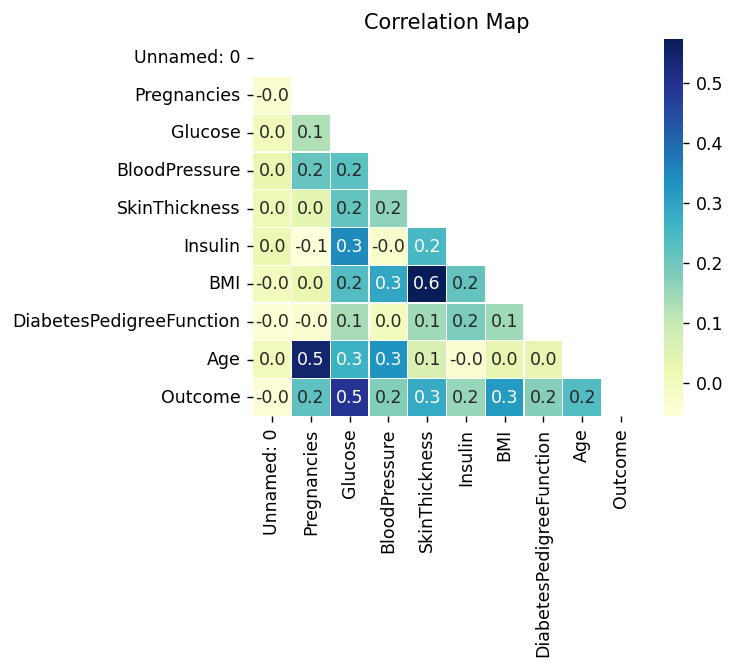

In [7]:
# plot correlation map prior to adjustment
plt.figure(dpi = 125,figsize= (5,4))
mask = np.triu(df1.corr())
#np.triu returns lower triangle for our heatmap as we do not need upper map
sns.heatmap(df1.corr(),mask = mask, fmt = ".1f",annot=True,lw=0.1,cmap = 'YlGnBu')
plt.title('Correlation Map')
plt.show()

In [8]:
# split data into training and testing sets, stratify to preserve the proportion of target as in original dataset 
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# training data using Logistic Regression Classifier
# https://www.analyticsvidhya.com/blog/2020/10/improve-class-imbalance-class-weights/
# Weights associated with classes in the form {class_label: weight}
lr_clf = LogisticRegression(random_state=42, class_weight={0:0.33, 1:0.67})
lr_clf.fit(X_train, y_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [10]:
# training data using Random Forest Classifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.82


In [11]:
# training data using XGBClassifier
XGB_clf = XGBClassifier(learning_rate=0.007)
XGB_clf.fit(X_train, y_train)
XGB_pred = XGB_clf.predict(X_test)
print('Accuracy of XGB classifier on test set: {:.2f}'.format(XGB_clf.score(X_test, y_test)))

Accuracy of XGB classifier on test set: 0.81


In [12]:
# training data using kNN
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_pred = knn_clf.predict(X_test)
print('Accuracy of kNN classifier on test set: {:.2f}'.format(knn_clf.score(X_test, y_test)))

Accuracy of kNN classifier on test set: 0.70


**Another route to try which is using SMOTE to sample up the minority.**

In [13]:
# now we re-sample to make a balanced outcome
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

# only re-sample the training data, nothing should be done to the validation data
X_sm , y_sm = sm.fit_resample(X_train, y_train)

In [14]:
# check data balance
np.bincount(y_sm)

array([400, 400])

In [15]:
# training data using Logistic Regression
lr_clf2 = LogisticRegression()
lr_clf2.fit(X_sm, y_sm)
y_pred = lr_clf2.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_clf2.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.73


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [16]:
# training data using Random Forest Classifier
rf_clf2 = RandomForestClassifier()
rf_clf2.fit(X_sm, y_sm)
rf_pred = rf_clf2.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf_clf2.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.82


In [17]:
# training data using XGBClassifier
XGB_clf2 = XGBClassifier(learning_rate=0.007)
XGB_clf2.fit(X_sm, y_sm)
XGB_pred = XGB_clf2.predict(X_test)
print('Accuracy of XGB classifier on test set: {:.2f}'.format(XGB_clf2.score(X_test, y_test)))

Accuracy of XGB classifier on test set: 0.77


In [18]:
# training data using kNN
knn_clf2 = KNeighborsClassifier()
knn_clf2.fit(X_sm, y_sm)
knn_pred = knn_clf2.predict(X_test)
print('Accuracy of kNN classifier on test set: {:.2f}'.format(knn_clf2.score(X_test, y_test)))

Accuracy of kNN classifier on test set: 0.70


**Hyperparameters Tuning for Random Forest Classifier**

In [19]:
# RandomTreeClassifier hyperparameter tuning by using GridSearchCV
%%time
forest = RandomForestClassifier()

# Create the grid parameter:
grid_rf = {'n_estimators': [100, 120, 150],
           'criterion': ['entropy', 'gini'], 
           'max_depth': [None,1,3,5,7,9],
           'max_features': range(1,11),  
           'min_samples_split': range(2, 10),
					 'min_samples_leaf': [1,3,5]}

# create the grid instance
gs_rf = GridSearchCV(forest, grid_rf, cv=3, n_jobs=-1)

# fit using grid search
gs_rf.fit(X_sm, y_sm)

# print best accuracy and best parameters:
print('Best accuracy: %.3f' % gs_rf.best_score_)
print('\nBest params:\n', gs_rf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5184 fits failed out of a total of 25920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5184 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/jobl

Best accuracy: 0.869

Best params:
 {'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
CPU times: user 3min 1s, sys: 9.6 s, total: 3min 11s
Wall time: 1h 28min


In [24]:
# training data using Random Forest Classifier
rf_clf3 = RandomForestClassifier(n_estimators=120,
                                 criterion='entropy', 
                                 max_depth=None,
                                 min_samples_split=2,
                                 min_samples_leaf=1, 
                                 max_features=1, 
                                 random_state=42,
                                 )
rf_clf3.fit(X_sm, y_sm)
rf_pred = rf_clf3.predict(X_test)
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf_clf3.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.82


In [25]:
# time to get the pickle
import pickle
pickle.dump(rf_clf3, open("model.pkl", "wb"))
# pickl = {'model': rf_clf}
# pickle.dump(pickl, open( 'model_file' + ".pkl", "wb" ))